# Introduction to ROOT & Documentation in Jupyter
## Weekly Report - 1st week, by Gabriel

This week the goal was to make Jupyter (Python friendly environment) read and plot a ROOT macros (C++ based). We will use this data to fit a gaussian and visualize it.
1. Let's start by seting up ROOT:

In [9]:
import os
print(os.getcwd())
print(os.listdir('.'))

/workspace
['example.C', 'notebook-example.ipynb', 'plot.pdf', 'plotfit.png', 'plot.png', 'Untitled.ipynb', '.ipynb_checkpoints', 'example-b1', 'plotfit.pdf', 'notebook-example.pdf']


In [2]:
# 1. ROOT SETUP

import ROOT
from ROOT import TCanvas, TH1F, TF1, gStyle

2. Load your macro and plot observables

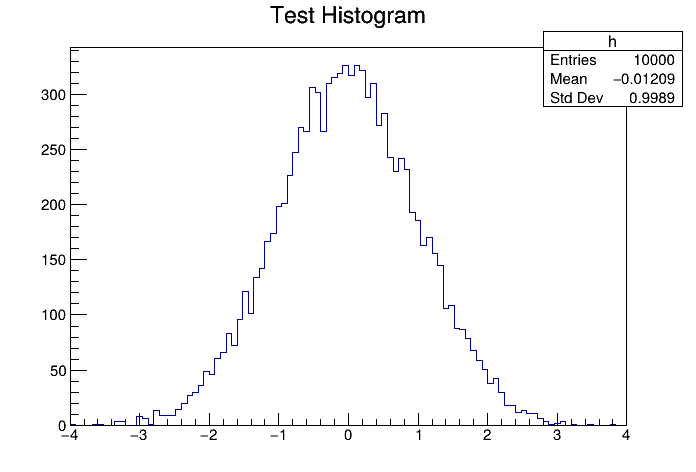

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file plot.png has been created


In [4]:
# run your macro
ROOT.gROOT.ProcessLine('.x example.C')

# grab the current canvas
c = ROOT.gPad.GetCanvas()
c.SaveAs("plot.png")

# display in Jupyter
from IPython.display import Image
Image("plot.png")

3. Load your macro and call it's function (title of file).

In [5]:
h1 = ROOT.gDirectory.Get("h")
print("Entries:", h1.GetEntries())
print("Mean:", h1.GetMean())

Entries: 10000.0
Mean: -0.012086278708383398


4. Define Gaussian (explicitly or call it's function) perform fit and draw.

In [6]:
# Define a Gaussian function over the histogram range
gaus = ROOT.TF1("gaus", "gaus", -4, 4)
# Fit histogram with Gaussian
h1.Fit(gaus, "s")  # "R" = restrict to given range

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      87.3387
NDf                       =           82
Edm                       =  1.42505e-06
NCalls                    =           53
Constant                  =      321.175   +/-   3.91347     
Mean                      =  -0.00792159   +/-   0.00997018  
Sigma                     =     0.986222   +/-   0.00689133   	 (limited)


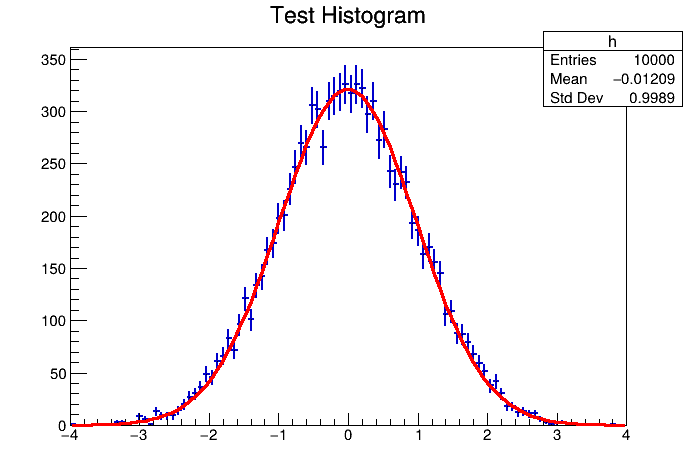

Info in <TCanvas::Print>: png file plotfit.png has been created


In [7]:
# Draw
c = ROOT.TCanvas()

# Draw histogram with a fill color
h1.SetLineColor(ROOT.kBlue+1)
h1.SetLineWidth(2)
h1.Draw("E")   # "E" draws error bars

# Style the Gaussian fit
gaus.SetLineColor(ROOT.kRed)
gaus.SetLineWidth(3)
gaus.Draw("same")
#Draw canvas
#c.Draw()
#Save

# grab the current canvas
c = ROOT.gPad.GetCanvas()
c.SaveAs("plotfit.png")

# display in Jupyter
from IPython.display import Image
Image("plotfit.png")

# Gaussian Fit Exercise

We generated random numbers following a Gaussian distribution 
with mean **0** and sigma **1**.  
The histogram shows the data, and the red curve is a Gaussian fit.

---

### Questions

1. What is the mean value obtained from the fit?  
   - Compare it with the expected mean (0).  

2. What is the sigma (standard deviation) obtained from the fit?  
   - Compare it with the expected sigma (1).  

3. Does the fitted Gaussian describe the data well?  
   - Look at the shape of the curve vs. the histogram.  

4. How would the result change if we generated more entries?  
   - Would the error on the fit parameters increase or decrease?  

---


In [8]:
# Show results and compare (...)
print("Mean:", gaus.GetParameter(1))
print("Sigma:", gaus.GetParameter(2))

Mean: -0.007921594946225971
Sigma: 0.9862218428292222


### Conclusions

- The fit parameters are close to the expected values? 
- With more statistics, the uncertainties become smaller.  
- ROOT + Jupyter allows us to **document results**,  
  including both the code and the interpretation.  